# **6. RECURSION**

# 6.1. Recursion

In [2]:
def triangular_loop(nth):
    total = 0
    print("Triangular pattern:\n")
    for n in range(1, nth + 1):   # 1 to nth (increasing order)
        print("X" * n)            # print n X's on one line
        total += n
    print(f"\nTotal (triangular number): {total}")
    return total

triangular_loop(10)

Triangular pattern:

X
XX
XXX
XXXX
XXXXX
XXXXXX
XXXXXXX
XXXXXXXX
XXXXXXXXX
XXXXXXXXXX

Total (triangular number): 55


55

In [ ]:
# Compute triangular numbers

def triangular_loop(nth): # Get the nth triangular number using a loop
   total = 0            # Keep a total of all the columns
   for n in range(nth, 0, -1): # Start at nth and go back to 1
      total += n        # add n (column height) to total
   return total         # Return the total of all the columns


def triangular(nth):    # Get the nth triangular number recursively
   if nth < 1: return 0 # For anything less than 1, it's 0
   return (nth +        # Otherwise add this column to the preceding
           triangular(nth - 1)) # triangular number


def triangular_rec(nth): # Get the nth triangular number - recursive
   return (0 if nth < 1 else # It's 0 for anything <1, else add nth to
           nth + triangular_rec(nth - 1)) # prec. triangular number


def show_triangular(nth): # Print the recursive execution steps of
   print('Computing triangular number #', nth) # computing the nth
   if nth < 1:            # triangular number.  Base case
      print('Base case. Returning 0') # Print the return information
      return 0
   value = nth + show_triangular(nth - 1) # Non-base case, get value
   print('Returning', value, 'for #', nth) # Print the return info
   return value





from LinkStack import *

def triangular_via_stack(nth): # Get the nth triangular number using
   todo = LinkStack()          # a stack of problem descriptions
   todo.push([nth, None])      # Description: nth and recursive result
   while not todo.isEmpty():   # Loop until no more problems to solve
      top = todo.peek()        # Look at topmost problem
      if top[1] is None:       # If recursive result is not solved,
         if top[0] < 1:        # check if top is base case
            top[1] = 0         # If so, then no recursion needed
         else:                 # Otherwise, solve smaller problem
            todo.push([top[0] - 1, None])
      else:                    # Topmost is solved
         top = todo.pop()      # Pop it off the stack
         if todo.isEmpty():    # If it was the last one,
            return top[1]      # then return the solution
         else:                 # Else add recursive call result to 
            caller = todo.peek() # caller's nth which is next on stack
            caller[1] = caller[0] + top[1]
   raise Exception("Stack empty without finding solution")

In [3]:
from Triangular import *

print('Testing triangular implementations')
functions = (triangular_loop, triangular, triangular_rec, triangular_via_stack)
for n in range(10):
   results = [func(n) for func in functions]
   results.append(n * (n + 1) // 2)
   if any(results[j] != results[j + 1] for j in range(len(results) - 1)):
      print('\nUh-oh.  Results are inconsistent for n = {}'.format(n))
      for func in functions:
         print(func.__name__, 'returns', func(n))
   else:
      print(n, end=' ')
print()

Testing triangular implementations
0 1 2 3 4 5 6 7 8 9 


Calling a function or method involves certain overhead. Control must be transferred from the location of the call to the beginning of the function. In addition, the arguments to the function and the address to which the function should return must be pushed onto an internal stack so that the function can access the argument values and know where to return.

In the case of the `triangular()` function, it’s probable that, as a result of this overhead, the while loop approach executes more quickly than the recursive approach. The penalty may not be significant, but if there are a large number of function calls as a result of a recursive function, it might be desirable to eliminate the recursion. We discuss this issue more at the end of this chapter.

Another inefficiency is that memory is used to store all the intermediate arguments and return values on the system’s internal stack. This behavior may cause problems if there is a large amount of data, leading to a stack overflow.

These efficiency concerns are especially relevant to triangular numbers and other numeric computations. There are usually mathematical simplifications that can avoid loops or 
recursion. As you might have guessed, the number of little squares in the triangle is about equal to the area of the triangle, which is half the area of the square formed by putting two of the triangles together, sharing their longest edge. For a square of width n, its area is `n^2`, so the area of the triangle would be `n^2/2`. The exact formula for the sum of all the integers from 0 to a positive integer, n, is `(n(n+1)/2)`

This formula shows up again and again in the study of data structures. The most efficient way to calculate it would be to implement the computation of this formula because the 
addition, multiplication, and division are all `O(1)` operations.

Recursion is usually used because it simplifies a problem conceptually, not because it’s inherently more efficient.


# 6.2. Factorials

Factorials are similar in concept to triangular numbers, except that multiplication is used instead of addition. The triangular number corresponding to n is found by adding n to the triangular number of **n–1**, while the factorial of n is found by multiplying n by the factorial of **n–1**. In other words, the fifth triangular number is 5+4+3+2+1, while the factorial of 5 is 5×4×3×2×1, which equals 120

In [ ]:
# Compute factorial numbers

def factorial(n):            # Get factorial of n
   if n < 1: return 1        # It's 1 for anything < 1
   return (n *               # Otherwise, multiply n 
           factorial(n - 1)) # by preceding factorial

# 6.3. Anagrams

Suppose you want to list all the anagrams of a specified word—that is, all possible permutations that can be made from the letters of the original word (whether 
they make a real word or not). We call this anagramming a word. Anagramming cat, for example, would produce:  
cat

cta

atc

act

tca

tac

In [6]:
# Compute the anagrams of a string of characters

def anagrams(word):            # Return a list of anagrams for word
   if len(word) <= 1:          # Empty words and single letters
      return [word]            # have a single anagram, themselves
   result = []                 # Start with an empty list
   for part in anagrams(word[1:]): # Loop over smaller anagrams
      for i in range(len(part) + 1): # For each index in smaller word
         result.append(        # Add a new anagram with
            part[:i] +         # the smaller word up to the index
            word[0] +          # plus the 1st character of this word
            part[i:])          # plus the rest of the smaller word
   return result               # Return the list of bigger anagrams

anagrams('co')

['co', 'oc']

# 6.4. ORDERED RECORD ARRAY

In [ ]:
# Implement an Ordered Array of Records structure using recursive
# binary search

def identity(x):                    # The identity function
   return x

class OrderedRecordArray(object):
   def __init__(self, initialSize, key=identity):    # Constructor
      self.__a = [None] * initialSize  # The array stored as a list
      self.__nItems = 0                # No items in array initially
      self.__key = key                 # Key function gets record key

   def __len__(self):                  # Special def for len() func
      return self.__nItems             # Return number of items
   
   def get(self, n):                   # Return the value at index n
      if n >= 0 and n < self.__nItems: # Check if n is in bounds, and
         return self.__a[n]            # only return item if in bounds
      raise IndexError("Index " + str(n) + " is out of range")
         
   def find(self, key,              # Find index at or just below key
            lo = 0,                 # in ordered list between lo 
            hi = None):             # and hi using recursion
      if hi is None:                # If hi was not provided,
         hi = self.__nItems - 1     # use upper bound of array
      if lo > hi:                   # If range is empty,
         return lo                  # return lo for base case
      mid = (lo + hi) // 2          # Select the midpoint
      if self.__key(self.__a[mid]) == key:  # Did we find it?
         return mid                 # Return location of item

      if self.__key(self.__a[mid]) < key: # Is key in upper half?
         return self.find(          # then recursively search
            key, mid + 1, hi)       # in upper half
      else:                         # Otherwise, it must be in
         return self.find(          # lower half so recursively
            key, lo, mid - 1)       # search below mid

   def search(self, key):
      idx = self.find(key)          # Search for a record by its key
      if idx < self.__nItems and self.__key(self.__a[idx]) == key:
         return self.__a[idx]       # and return item if found
   
   def insert(self, item):    # Insert item into the correct position
      j = self.find(self.__key(item))     # Find where item should go
      
      for k in range(self.__nItems, j, -1): # Move bigger items right
         self.__a[k] = self.__a[k-1]
         
      self.__a[j] = item      # Insert the item
      self.__nItems += 1      # Increment the number of items

   def delete(self, item):              # Delete any occurrence
      j = self.find(self.__key(item))   # Try to find the item
      if j < self.__nItems and self.__a[j] == item:  # If found,
         self.__nItems -= 1             # One fewer at end
         for k in range(j, self.__nItems): # Move bigger items left
            self.__a[k] = self.__a[k+1]
         return True                   # Return success flag

      return False            # Made it here; item not found

   def traverse(self, function=print): # Traverse all items
      for j in range(self.__nItems):   # and apply a function
         function(self.__a[j])

   def __str__(self):                  # Special def for str() func
      ans = "["                        # Surround with square brackets
      for i in range(self.__nItems):   # Loop through items
         if len(ans) > 1:              # Except next to left bracket,
            ans += ", "                # separate items with comma
         ans += str(self.__a[i])       # Add string form of item
      ans += "]"                       # Close with right bracket
      return ans

In [5]:
from OrderedRecordArray import *

def second(x):
    return x[1]

maxSize = 1000
arr = OrderedRecordArray(maxSize, second)


# insertion
print("INSERTION")
for rec in [('a', 3.1), ('b', 7.5), ('c', 6.0), ('d', 3.1),
            ('e', 1.4), ('f', -1.2), ('g', 0.0), ('h', 7.5),
            ('i', 7.5), ('j', 6.0)]:
    arr.insert(rec)

print(f"Array containing {len(arr)} items:\n {arr}\n")


# deleting items
print("DELETION")
for rec in [('c', 6.0), ('g', 0.0), ('g', 0.0), ('b', 7.5), ('i', 7.5)]:
    print (f"Deleting {rec} returns {arr.delete(rec)}")

print(f"Array after deletion has {len(arr)} items:\n {arr}\n")



# lower and upper bound
print("LOWER AND UPPER BOUND")
for key in [-9.9, 4.4, 6.0, 7.5, 9.9]:
    index = arr.find(key)
    print(f"find {key} returns: {index} and get{index} returns: {arr.get(index) if index < len(arr) else 'out of bounds'}")

INSERTION
Array containing 10 items:
 [('f', -1.2), ('g', 0.0), ('e', 1.4), ('d', 3.1), ('a', 3.1), ('j', 6.0), ('c', 6.0), ('i', 7.5), ('h', 7.5), ('b', 7.5)]

DELETION
Deleting ('c', 6.0) returns False
Deleting ('g', 0.0) returns True
Deleting ('g', 0.0) returns False
Deleting ('b', 7.5) returns False
Deleting ('i', 7.5) returns True
Array after deletion has 8 items:
 [('f', -1.2), ('e', 1.4), ('d', 3.1), ('a', 3.1), ('j', 6.0), ('c', 6.0), ('h', 7.5), ('b', 7.5)]

LOWER AND UPPER BOUND
find -9.9 returns: 0 and get0 returns: ('f', -1.2)
find 4.4 returns: 4 and get4 returns: ('j', 6.0)
find 6.0 returns: 5 and get5 returns: ('c', 6.0)
find 7.5 returns: 6 and get6 returns: ('h', 7.5)
find 9.9 returns: 8 and get8 returns: out of bounds


# 6.5. TOWER OF HANOI

In [1]:
# Implment a recursive solution to the Tower of Hanoi puzzle

from SimpleStack import *

class TowerOfHanoi(object):    # Model the tower on 3 spindles using
                               # 3 stacks
   def __init__(self, nDisks=3): # Constructor w/ starting number of
      self.__stacks = [None] * 3 # Stacks of disks
      self.__labels = ['L', 'M', 'R'] # Labels for stacks/spindles
      self.__nDisks = nDisks   # Total number of disks
      self.reset()

   def reset(self):            # Initialize state of puzzle
      for spindle in range(3): # Set up each of 3 spindles
         self.__stacks[spindle] = Stack( # Start w/ empty stack
            self.__nDisks)     # that can hold all the disks
         if spindle == 0:      # On the first spindle,
            for disk in range( # push the disks on the stack
                  self.__nDisks, 0, -1): # in descending order of size
               self.__stacks[spindle].push(disk)

   def label(self, spindle):   # Get the label of spindle
      return self.__labels[spindle]

   def height(self, spindle):  # Get the number of disks on a spindle
      return len(self.__stacks[spindle])

   def topDisk(self, spindle): # Get top disk number on a spindle or
      if not self.__stacks[spindle].isEmpty(): # None if no disks
         return self.__stacks[spindle].peek() # Peek at top disk

   def __str__(self):          # Show puzzle state as a string
      result = ""              # Start with empty string
      for spindle in range(3): # Loop over spindles
         if len(result) > 0:   # After first spindle,
            result += "\n"     # separate stacks on new lines
         result += (
            self.label(spindle) + ': ' + # Add spindle label
            str(self.__stacks[spindle])) # and spindle contents
      return result

   def move(self, source, to,  # Move a single disk from source
            show=False):       # spindle to another, possibly printing
      if self.__stacks[source].isEmpty(): # Source spindle must have
         raise Exception(      # a disk, or it's an error
            "Cannot move from empty spindle " + self.label(source))
      if (not self.__stacks[to].isEmpty() and # Destination cannot
          self.topDisk(source) > # have a disk smaller than that of
          self.topDisk(to)):   # source
         raise Exception(
            "Cannot move disk " + str(self.topDisk(source)) +
            "on top of disk " + str(self.topDisk(to)))
      self.__stacks[to].push(  # Push top disk of source spindle
         self.__stacks[source].pop()) # on to the 'to' spindle
      if show:
         print('Move disk', self.topDisk(to),
               'from spindle', self.label(source),
               'to', self.label(to))

   def solve(self,             # Solve the puzzle to move
             nDisks=None,      # N disks from
             start=0,          # starting spindle
             goal=2,           # to goal spindle
             spare=1,          # with spare spindle
             show=False):      # and possibly showing steps
      if nDisks is None:       # Default number of disks to move
         nDisks = self.height(start) # is all the disks on start
      if nDisks <= 0:          # If no request to move disks
         return                # there's nothing to do
      if self.height(start) < nDisks: # Check if there are fewer
         raise Exception(             # disks to move than requested
            "Not enough disks (" + str(nDisks) +
            ") on starting spindle " + self.label(start))

      self.solve(nDisks - 1,  # Move n - 1 from start to spare with
                 start, spare, goal, show) # goal as spare
      self.move(start, goal, show)  # Move nth from start to goal
      if show: print(self)          # Show puzzle state after move
      self.solve(nDisks - 1,  # Then move n - 1 from spare to goal
                 spare, goal, start, show) # with start as spare
      if (nDisks == self.__nDisks and   # Were all disks moved?
          show):              # then puzzle is solved and can show
         print("Puzzle complete") # conclusion if requested

In [2]:
from TowerOfHanoi import *

# Test the exceptions
puzzle = TowerOfHanoi(2)
try:
   print('Trying to solve with', puzzle.height(0),
         'disks by asking to move', puzzle.height(0) + 1,
         'disks')
   puzzle.solve(nDisks=puzzle.height(0) + 1, show=True)
except Exception as e:
   print('Exception raised:', e)

try:
   print('Starting with puzzle:')
   print(puzzle)
   print('Trying to move a disk from', puzzle.label(1),
         'to', puzzle.label(2))
   puzzle.move(1, 2, True)
except Exception as e:
   print('Exception raised:', e)

   
for i in range(1, 4):
   puzzle = TowerOfHanoi(i)
   print('\nTower of Hanoi with', i, 'disks\n', puzzle)
   print('>>> TowerOfHanoi({}).solve(show=True)'.format(i))
   puzzle.solve(show=True)

Trying to solve with 2 disks by asking to move 3 disks
Exception raised: Not enough disks (3) on starting spindle L
Starting with puzzle:
L: [2, 1]
M: []
R: []
Trying to move a disk from M to R
Exception raised: Cannot move from empty spindle M

Tower of Hanoi with 1 disks
 L: [1]
M: []
R: []
>>> TowerOfHanoi(1).solve(show=True)
Move disk 1 from spindle L to R
L: []
M: []
R: [1]
Puzzle complete

Tower of Hanoi with 2 disks
 L: [2, 1]
M: []
R: []
>>> TowerOfHanoi(2).solve(show=True)
Move disk 1 from spindle L to M
L: [2]
M: [1]
R: []
Move disk 2 from spindle L to R
L: []
M: [1]
R: [2]
Move disk 1 from spindle M to R
L: []
M: []
R: [2, 1]
Puzzle complete

Tower of Hanoi with 3 disks
 L: [3, 2, 1]
M: []
R: []
>>> TowerOfHanoi(3).solve(show=True)
Move disk 1 from spindle L to R
L: [3, 2]
M: []
R: [1]
Move disk 2 from spindle L to M
L: [3]
M: [2]
R: [1]
Move disk 1 from spindle R to M
L: [3]
M: [2, 1]
R: []
Move disk 3 from spindle L to R
L: []
M: [2, 1]
R: [3]
Move disk 1 from spindle M to

If you’ve worked with binary numbers, it should be clear that it takes **2^N – 1** moves to solve the N-disk puzzle. This **O(2^N)** complexity grows even faster than the sorting algorithms that you saw in Chapter 3, "Simple Sorting," that were **O(N^2)**. For example, 10^2 is 100, but 2^10 is 1,024.

# 6.6. SORTING WITH MERGESORT

It is a much more efficient sorting technique than those you saw in Chapter 3, at least in terms of speed.

**The downside of the mergesort is that it requires an additional array in memory, equal in size to the one being sorted. If your original array barely fits in memory, the mergesort won’t work. If you have enough space, however, it’s a good choice.**

You may wonder how much memory is required to hold all these smaller arrays during the mergesort. To merge two arrays of size M and N together, the algorithm needs another 
M+N size array to hold the result. Reviewing the basic algorithm:

* (i) Sort the first half of the array

* (ii) Sort the second half of the array

* (iii) Merge the two sorted halves together 

Only the third step requires temporary storage. The first two steps can be done by putting the result back in the input array cells. So, if you expand step 3 to be:

1. Merge the two sorted halves of the input array into a temporary array

2. Copy the temporary array back into the input array

In [1]:
# Implement the mergesort algorithm on arrays

def identity(x): return x        # Identity function

from Array import *

class Mergesort(object):         # An object to mergesort Arrays
   def __init__(self,            # Constructor takes the unordered
                unordered,       # array and orders its items by using
                key=identity):   # mergesort on their keys
      self.__arr = unordered     # Array starts unordered 
      self.__key = key           # Key func. returns sort key of item
      n = len(unordered)         # Get number of items
      self.__work = Array(n)     # A work array of the same length
      for i in range(n):         # is needed to rearrange the items
         self.__work.insert(None) # Work array is filled with None
      self.mergesort(0, n)       # Call recursive sort on full array

   def mergesort(self, lo, hi):  # Perform mergesort on subrange
      if lo + 1 >= hi:           # If subrange has 1 or fewer items,
         return                  # then it is already sorted
      mid = (lo + hi) // 2       # Otherwise, find middle index
      self.mergesort(lo, mid)    # Sort the lower half of subrange,
      self.mergesort(mid, hi)    # Sort the upper half of subrange,
      self.merge(lo, mid, hi)    # Merge the 2 sorted halves

   def merge(self, lo, mid, hi): # Merge 2 sorted subranges of array
      n = 0                      # into work array which starts empty
      idxLo = lo                 # Use indices into lo and hi
      idxHi = mid                # subranges to track next items
      while (idxLo < mid and     # Loop until one of the subranges
             idxHi < hi):        # is empty
         itemLo = self.__arr.get(idxLo) # Get next items from the
         itemHi = self.__arr.get(idxHi) # two subranges
         if (self.__key(itemLo) <=   # Compare keys of those items
             self.__key(itemHi)):
            self.__work.set(n, itemLo) # Lo subrange is first so
            idxLo += 1           # copy item and advance to next
         else:
            self.__work.set(n, itemHi) # Hi subrange is first so
            idxHi += 1           # copy item and advance to next
         n += 1                  # One more item now in work array

      while idxLo < mid:         # Loop to copy remaining lo 
         self.__work.set(        # subrange items to work array
            n, self.__arr.get(idxLo))
         idxLo += 1
         n += 1

      while n > 0:               # Copy sorted work array contents
         n -= 1                  # back to input/output array in
         self.__arr.set(         # reverse order
            lo + n, self.__work.get(n))


In [ ]:
from Mergesort import *
from Array import *

values = [19, 49, 70, 72, 43, 80, 95, 46, 19, 18, 45, 6, 56, 85]
array = Array(len(values))
for value in values:
   array.insert(value)

print('Initial array contains', len(array), 'items')
array.traverse()

Mergesort(array)  

print('After applying Mergesort, array contains', len(array), 'items')
array.traverse()

In [7]:
from Mergesort import *
from Array import *

values = [19, 49, 70, 72, 43, 80, 95, 46, 19, 18, 45, 6, 56, 85]
array = Array(len(values))
print(f"The array:, {array}\n")

for value in values:
   array.insert(value)

print(f'Initial array contains {len(array)} items\n')
array.traverse()

Mergesort(array) 
print('After applying Mergesort, array contains', len(array), 'items')
array.traverse()

The array:, <Array.Array object at 0x0000018F135FE360>

Initial array contains 14 items

19
49
70
72
43
80
95
46
19
18
45
6
56
85
After applying Mergesort, array contains 14 items
6
18
19
19
43
45
46
49
56
70
72
80
85
95


Although the bubble, insertion, and selection sorts described in Chapter 3 take **O(N^2)** time, the mergesort is **O(N×log N)**.

# 6.7. RECURSION AND STACKS



In [ ]:
# Implement the mergesort algorithm on arrays using an explicit stack

def identity(x): return x        # Identity function

from Array import *
from LinkStack import *

class Mergesort(object):         # An object to mergesort Arrays
   def __init__(self,            # Constructor, takes the unordered
                unordered,       # array and orders its items by using
                key=identity):   # mergesort on their keys
      self.__arr = unordered     # Array starts unordered 
      self.__key = key           # Key func. returns sort key of item
      n = len(unordered)         # Get number of items
      self.__work = Array(n)     # A work array of the same length
      for i in range(n):         # is needed to rearrange the items
         self.__work.insert(None) # Work array is filled with None
      self.__todo = LinkStack()  # Stack to manage subproblems
      self.__todo.push([0, None, n]) # Add overall problem description
      self.mergesort()           # Call mergesort on problem

   def mergesort(self):          # Perform mergesort on subrange
      while not self.__todo.isEmpty(): # Loop until no problems remain
         lo, mid, hi = self.__todo.peek() # Get [lo, mid, hi] values
         print('Mergesort working on [lo, mid, hi] =', # Show progress
               self.__todo.peek(), 'at depth', len(self.__todo))
         if lo + 1 >= hi:        # If subrange has 1 or fewer items,
            self.__todo.pop()    # then done, and remove problem
            if self.__todo.isEmpty(): # If that was 1st problem
               return            # then everything is done
            self.__todo.peek()[1] = lo # Otherwise, store lo index in
                                 # caller's problem description for
                                 # 'mid' to signal completion
         elif mid is None:       # If mid is None, need to compute it
            mid = (lo + hi) // 2 # Find middle index, and add subtask
            self.__todo.push(    # for the lower half of subrange
               [lo, None, mid])
         elif (mid == lo):       # If mid is lo, lower half is done
            self.__todo.push(    # Add subtask for upper half of
               [(lo + hi) // 2, None, hi])  # subrange
         else:                   # Both lower half and upper half done
            print('Merging ranges [', lo, ',', mid, ') with [',
                  mid, ',', hi, ')')
            self.merge(lo, mid, hi)  # Merge the 2 sorted halves
            self.__todo.pop()    # Remove completed problem
            if self.__todo.isEmpty(): # If that was the 1st problem,
               return            # then everything is done
            self.__todo.peek()[1] = lo # Otherwise, signal caller
      raise Exception('Empty stack in mergesort')

   def merge(self, lo, mid, hi): # Merge 2 sorted subranges of array
      n = 0                      # into work array which starts empty
      idxLo = lo                 # Use indices into lo and hi
      idxHi = mid                # subranges to track next items
      while (idxLo < mid and     # Loop until one of the subranges
             idxHi < hi):        # is empty
         itemLo = self.__arr.get(idxLo) # Get next items from the
         itemHi = self.__arr.get(idxHi) # two subranges
         if (self.__key(itemLo) <=   # Compare keys of those items
             self.__key(itemHi)):
            self.__work.set(n, itemLo) # Lo subrange is first so
            idxLo += 1           # copy item and advance to next
         else:
            self.__work.set(n, itemHi) # Hi subrange is first so
            idxHi += 1           # copy item and advance to next
         n += 1                  # One more item now in work array

      while idxLo < mid:         # Loop to copy remaining lo 
         self.__work.set(        # subrange items to work array
            n, self.__arr.get(idxLo))
         idxLo += 1
         n += 1

      while n > 0:               # Copy sorted work array contents
         n -= 1                  # back to input/output array in
         self.__arr.set(         # reverse order
            lo + n, self.__work.get(n))


In [8]:
from MergesortViaStack import *
from Array import *

values = [19, 49, 70, 72, 43, 80, 95, 46, 19, 18, 45, 6, 56, 85]
array = Array(len(values))
for value in values:
   array.insert(value)

print('Initial array contains', len(array), 'items')
array.traverse()

Mergesort(array)  

print('After applying Mergesort, array contains', len(array), 'items')
array.traverse()

Initial array contains 14 items
19
49
70
72
43
80
95
46
19
18
45
6
56
85
Mergesort working on [lo, mid, hi] = [0, None, 14] at depth 1
Mergesort working on [lo, mid, hi] = [0, None, 7] at depth 2
Mergesort working on [lo, mid, hi] = [0, None, 3] at depth 3
Mergesort working on [lo, mid, hi] = [0, None, 1] at depth 4
Mergesort working on [lo, mid, hi] = [0, 0, 3] at depth 3
Mergesort working on [lo, mid, hi] = [1, None, 3] at depth 4
Mergesort working on [lo, mid, hi] = [1, None, 2] at depth 5
Mergesort working on [lo, mid, hi] = [1, 1, 3] at depth 4
Mergesort working on [lo, mid, hi] = [2, None, 3] at depth 5
Mergesort working on [lo, mid, hi] = [1, 2, 3] at depth 4
Merging ranges [ 1 , 2 ) with [ 2 , 3 )
Mergesort working on [lo, mid, hi] = [0, 1, 3] at depth 3
Merging ranges [ 0 , 1 ) with [ 1 , 3 )
Mergesort working on [lo, mid, hi] = [0, 0, 7] at depth 2
Mergesort working on [lo, mid, hi] = [3, None, 7] at depth 3
Mergesort working on [lo, mid, hi] = [3, None, 5] at depth 4
Mergeso

### **Combinations: Picking a Team**

In mathematics, a combination is a selection of things in which their order doesn’t matter.

For example, suppose there is a group of five candidate astronauts from which you want to select a team of three to go on a multiyear journey through the solar system. There is concern, however, about how the team members will get along and handle all the important tasks, so you decide to list all the possible teams—that is, all the possible combinations of three people.

You can name the candidates **A, B, C, D, E**. You want a program that would show the 10 possible combinations:

**ABC, ABD, ABE, ACD, ACE, ADE, BCD, BCE, BDE, CDE**

**Recursive Solution**

How would you write such a program? It turns out there’s an elegant recursive solution. It involves dividing these combinations into two groups:

1. Those that begin with A, and

2. Those taht don't

Suppose you abbreviate the idea of 3 people selected from a group of 5 as `C(5, 3)`. The `C()` function produces a set of teams. Let’s say n is the size of the group of candidates and k is the size of a team, that is `C(n, k)`.

A theorem says that if A is the first of the n candidates, then: **C(n,k)=A⊗C(n−1,k−1)+C(n−1,k)** where A ⊗ C(e) means add (cross) A to all the combinations produced by C(e),
and C(n - 1, i) means find all combinations of size i from the candidates other than A, which is one of the n candidates.

For the example of 3 people selected from a group of 5, you have: **C(5,3)=A⊗C(4,2)+C(4,3)**. First, find all the ways to select 2 people from 4 candidates, then all the ways to select 3 people from 4 candidates.

This example breaks a large problem into two smaller ones. Instead of selecting from a group of 5, you’re selecting twice from a group of 4, the candidates other than A. First, all the ways to select 2 people from 4 candidates, then all the ways to select 3 people from 4 candidates.





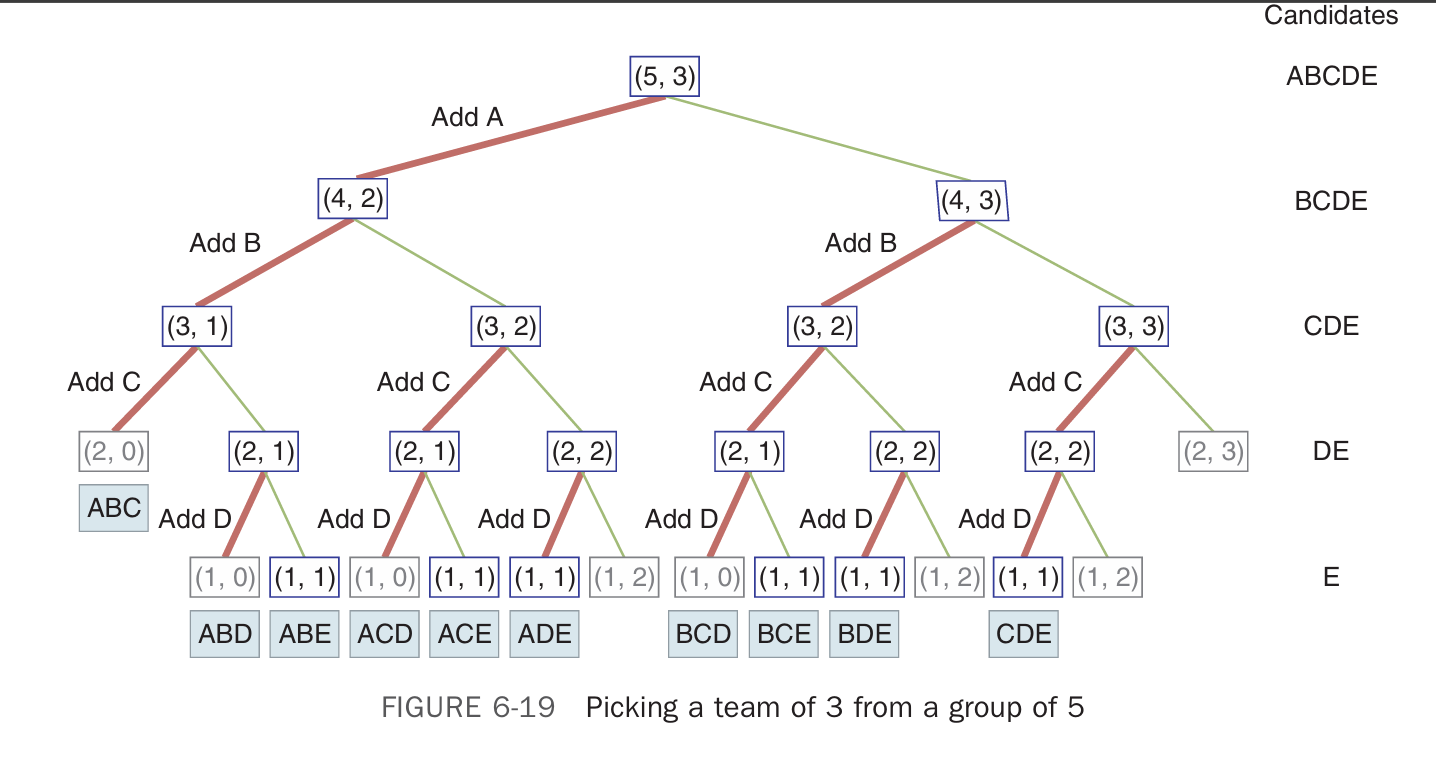

In [1]:
from IPython.display import Image, display
display(Image(filename="picture.png", width=800))